# Part 1: Importing Essential Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kickstarter/kickstarter_Cpgn.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import chardet
import datetime
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('../input/kickstarter/kickstarter_Cpgn.csv', low_memory=False)

In [4]:
df.shape

(378661, 15)

In [5]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Part 2 : Data Processing - Removal Of Null/Nan and Missing Values

In [6]:
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.06692001552840139


In [7]:
missing_cols = round(100*(df.isnull().sum()/len(df.index)), 2)
missing_cols.sort_values(ascending=False)

usd pledged         1.0
ID                  0.0
name                0.0
category            0.0
main_category       0.0
currency            0.0
deadline            0.0
goal                0.0
launched            0.0
pledged             0.0
state               0.0
backers             0.0
country             0.0
usd_pledged_real    0.0
usd_goal_real       0.0
dtype: float64

In [8]:
columns_with_missing_values = list(missing_cols[missing_cols >= 70].index)
len(columns_with_missing_values)

0

In [9]:
df.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

# Part 3 : Exploratory Data Analysis

### Part 3.1: Checking for duplicate values between usd_pledged and usd_pledged_real

In [12]:
duplicates = df.duplicated(['usd pledged', 'usd_pledged_real'])
count = 0
for x in duplicates:
    if x == True:
        count += 1
        
# Duplications percentage
print('Duplicates between USD_Pledged and USD_Pledged_Real: {} %'.format(round(count / len(df) * 100, 2)))

Duplicates between USD_Pledged and USD_Pledged_Real: 61.46 %


## Part 3.2: Plotting various EDA Graphs

In [13]:
#Checking for countries
df_country = df.groupby('country').agg({'ID':'count'})

In [14]:
df_country.reset_index(inplace=True)

In [15]:
df_country.sort_values('ID',ascending=False)

,country,ID
21,US,292624
9,GB,33671
3,CA,14756
1,AU,7839
5,DE,4171
8,FR,2939
12,IT,2878
16,NL,2868
7,ES,2276
19,SE,1757


In [16]:
df_country['Count'] = df_country['ID']
df_country.drop('ID', axis=1, inplace=True)

<AxesSubplot:xlabel='Count', ylabel='country'>

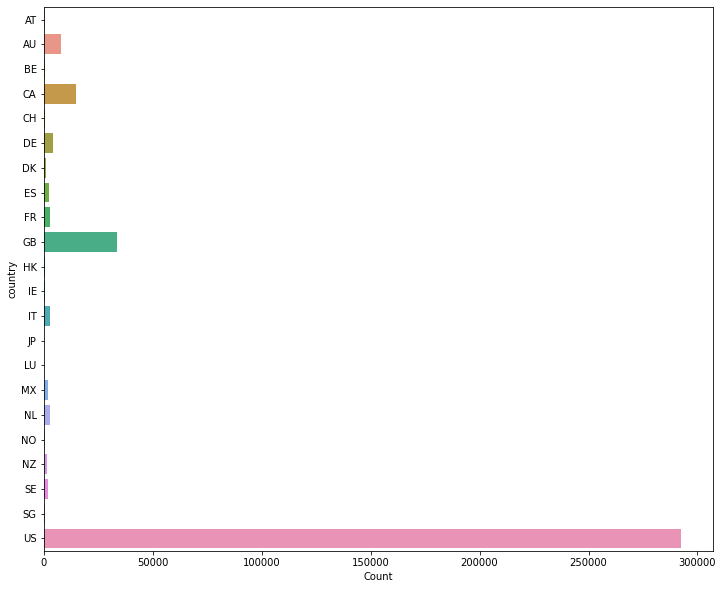

In [17]:
plt.figure(figsize=(12,10))
sns.barplot(x='Count', y='country', data=df_country)

In [18]:
#Above we can see that United States and Great Britain are the ones which have the greatest number of 
#kickstarter project proposals

In [19]:
#Analysing for the 'category' column
df_category = df.groupby('category').agg({'ID':'count'})

In [20]:
df_category.reset_index(inplace=True)
df_category['Count'] = df_category.ID
df_category.sort_values("Count",ascending=False)
df_category.drop('ID', axis=1, inplace=True)

In [21]:
df_category.sort_values('Count',ascending=False)

,category,Count
113,Product Design,22310
39,Documentary,16138
136,Tabletop Games,14178
90,Music,13340
129,Shorts,12357
...,...,...
122,Residencies,69
81,Letterpress,49
21,Chiptune,35
83,Literary Spaces,27


<AxesSubplot:xlabel='Count', ylabel='category'>

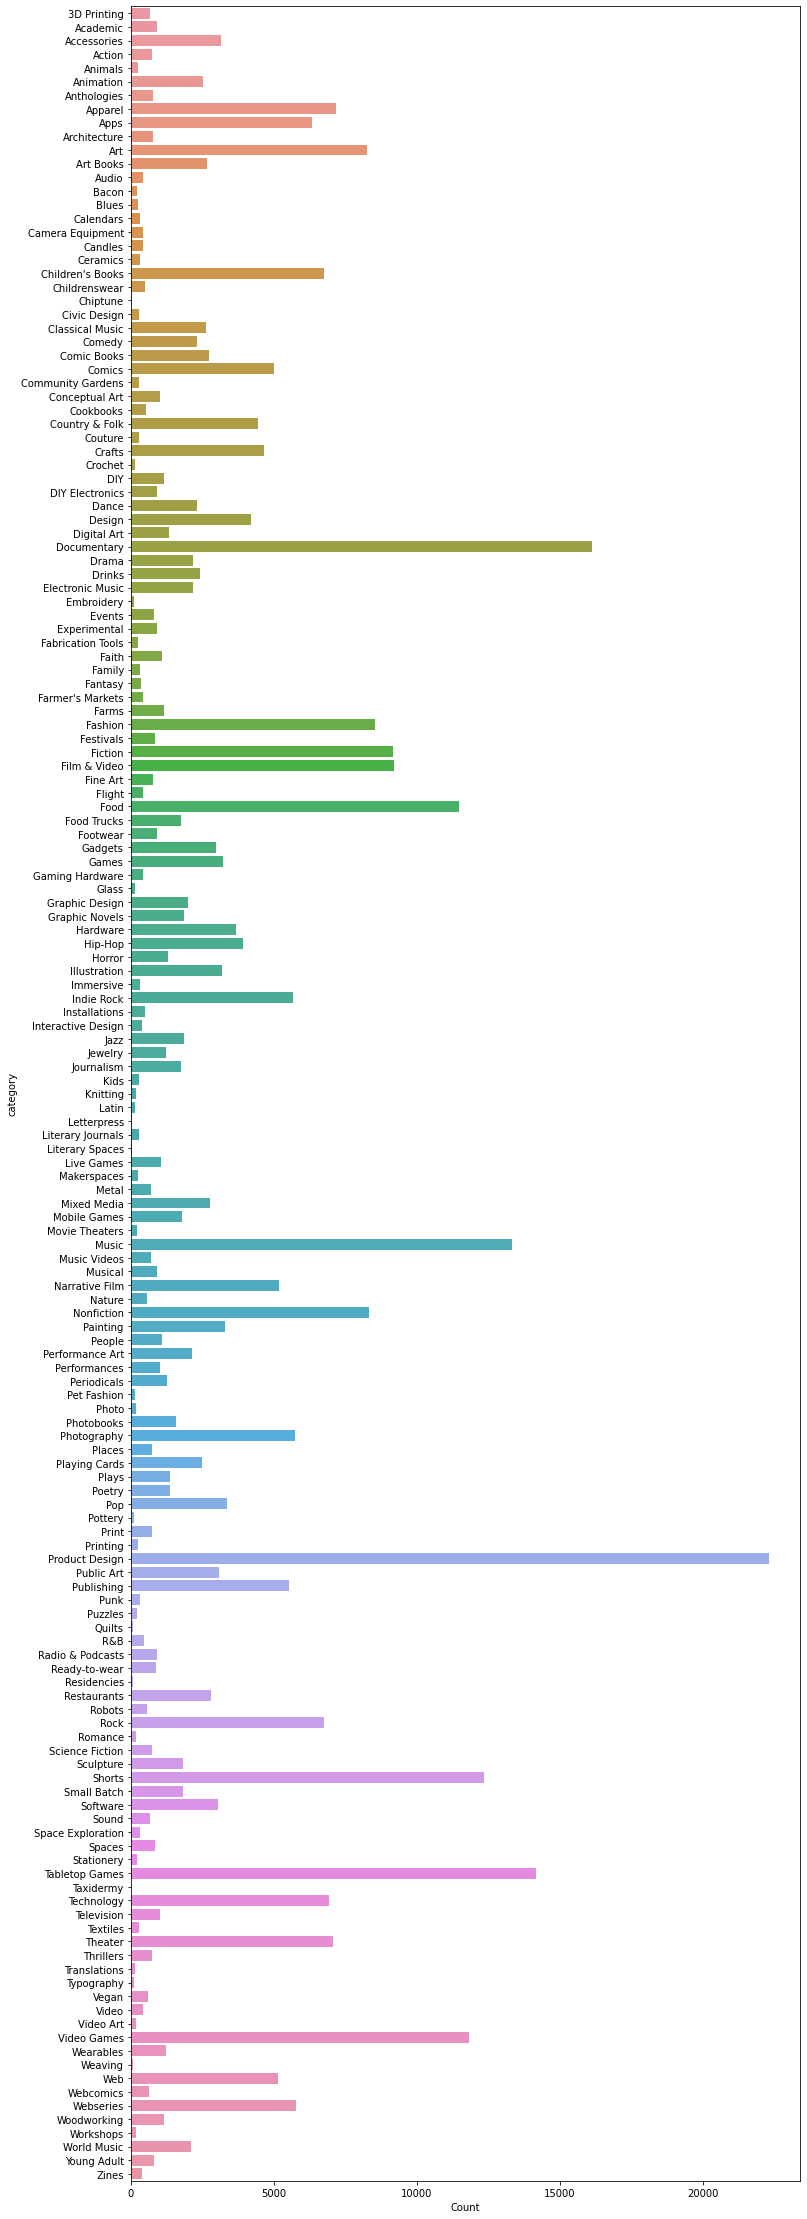

In [22]:
plt.figure(figsize=(12,40))
sns.barplot(x='Count', y='category', data=df_category)

In [23]:
#As we can see above, there are too many sub categories, which ideally fall under many bigger categories which are
# distinct themselves. It would be appropriate to analyse the main categories to see which one can be
# efficiently used for further processing

In [24]:
#Analysing for the 'main_category' column
df_main_category = df.groupby('main_category').agg({'ID':'count'})

In [25]:
df_main_category.reset_index(inplace=True)
df_main_category['Count'] = df_main_category.ID
df_main_category.sort_values("Count",ascending=False)
df_main_category.drop('ID', axis=1, inplace=True)

In [26]:
df_main_category.sort_values('Count',ascending=False)

,main_category,Count
6,Film & Video,62696
10,Music,49530
12,Publishing,39379
8,Games,35225
13,Technology,32562
4,Design,30066
0,Art,28152
7,Food,24599
5,Fashion,22812
14,Theater,10912


<AxesSubplot:xlabel='Count', ylabel='main_category'>

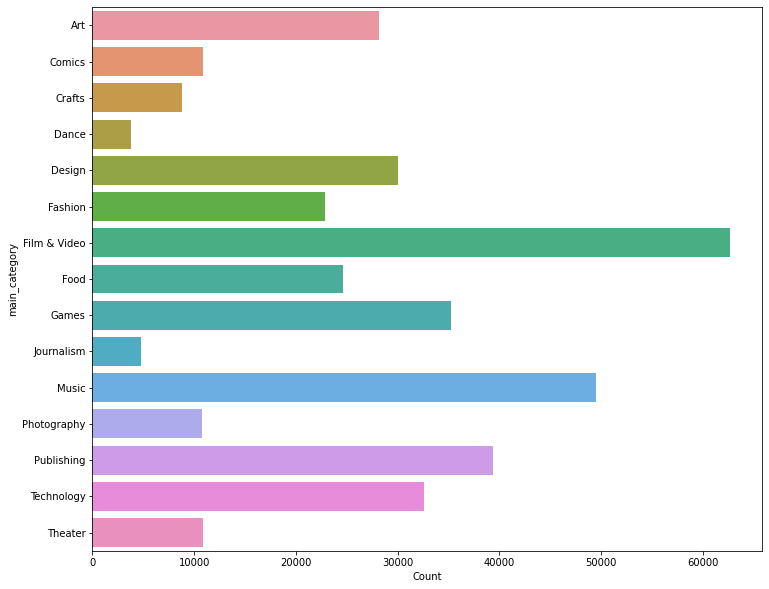

In [27]:
plt.figure(figsize=(12,10))
sns.barplot(x='Count', y='main_category', data=df_main_category)

In [28]:
#As we can see above, the 'main_category' column has a much more cleaner and distinct capability to separate out 
# the various project proposals

In [29]:
#Now we analyse the currency column
df_currency = df.groupby('currency').agg({'ID':'count'})

In [30]:
df_currency.reset_index(inplace=True)
df_currency['Count'] = df_currency['ID']
df_currency.sort_values("Count",ascending=False)
df_currency.drop('ID', axis=1, inplace=True)

In [31]:
df_currency.sort_values('Count',ascending=False)

,currency,Count
13,USD,292624
5,GBP,33671
4,EUR,17219
1,CAD,14756
0,AUD,7839
11,SEK,1757
8,MXN,1752
10,NZD,1447
3,DKK,1113
2,CHF,761


Text(0.5, 1.0, 'Country distribution of Projects')

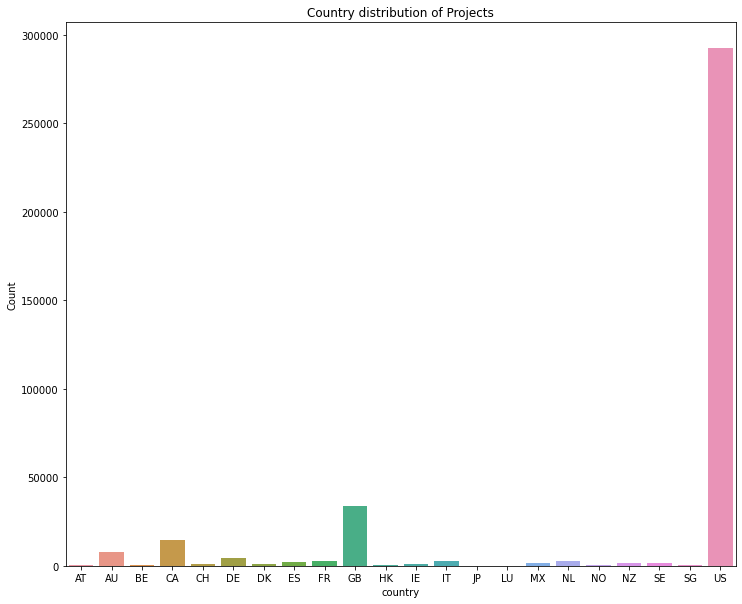

In [32]:
plt.figure(figsize=(12,10))
sns.barplot(y='Count', x='country', data=df_country)
plt.title('Country distribution of Projects')

In [33]:
#Here we can see that the most dominating currency is USD 

In [34]:
#Now we analyse the relation between average usd_pledged_real and category
df_pledged_category = df.groupby('main_category').agg({'usd_pledged_real':'mean'})

In [35]:
df_pledged_category.reset_index(inplace=True)
#df_currency['Count'] = df_currency['ID']
df_pledged_category.sort_values("usd_pledged_real",ascending=False)
# df_pledged_category.drop('usd_pledged_real', axis=1, inplace=True)

,main_category,usd_pledged_real
4,Design,24419.827975
13,Technology,21070.369202
8,Games,21043.934662
1,Comics,6610.443828
6,Film & Video,6218.197467
5,Fashion,5712.865119
7,Food,5114.282154
14,Theater,4006.045016
10,Music,3911.548999
11,Photography,3572.220982


Text(0.5, 1.0, 'USD_Pledged_Real v/s Main_Category')

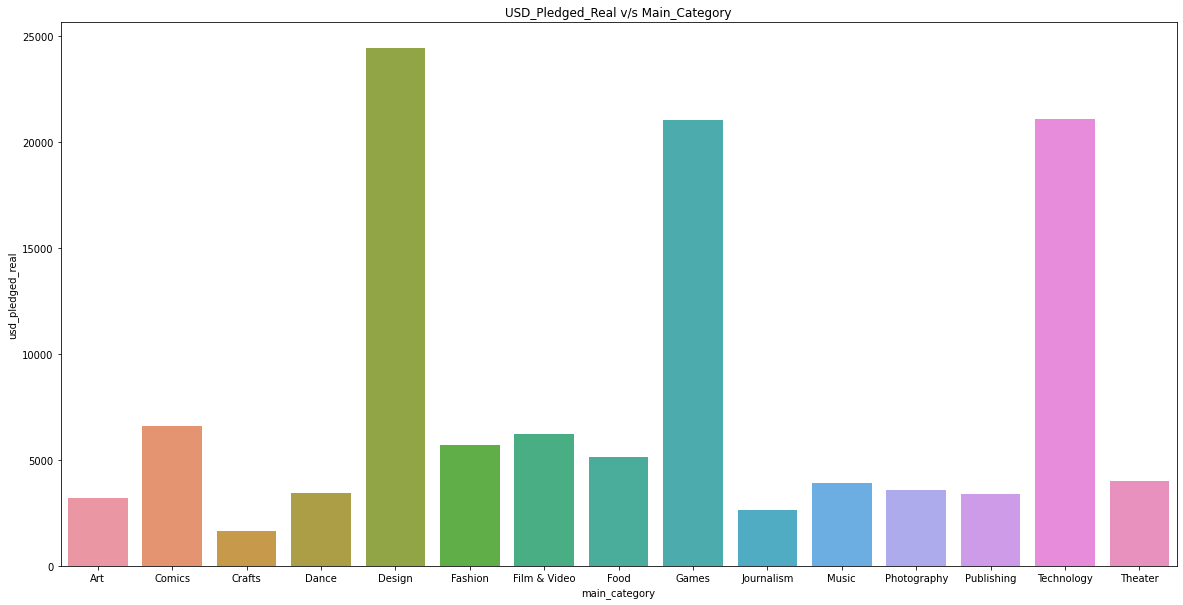

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(y='usd_pledged_real', x='main_category', data=df_pledged_category)
plt.title('USD_Pledged_Real v/s Main_Category')

In [37]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [38]:
df_state = df.groupby('state').agg({'ID':'count'})

In [39]:
df_state.reset_index(inplace=True)
df_state['Count'] = df_state['ID']
df_state.sort_values("Count",ascending=False)
df_state.drop('ID', axis=1, inplace=True)

In [40]:
df_state.sort_values('Count',ascending=False)

,state,Count
1,failed,197611
3,successful,133851
0,canceled,38757
2,live,2798
4,suspended,1843


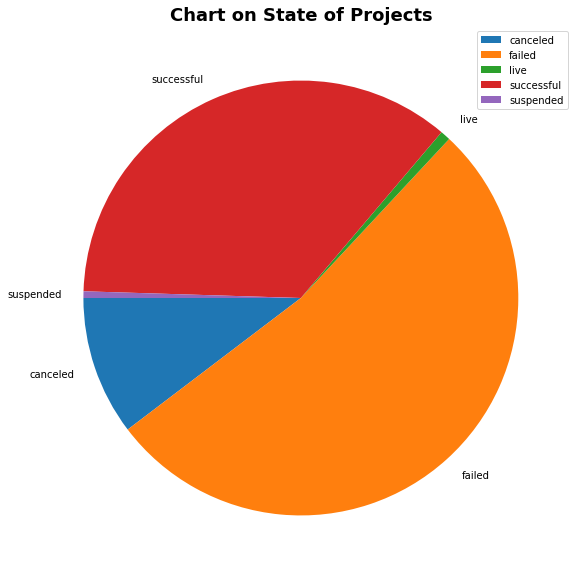

In [41]:
#Pie chart for value in =billions of dollars
plt.figure(figsize=(12,10))
plt.title('Chart on State of Projects', fontsize=18, fontweight='bold')
plt.pie(df_state['Count'],labels=df_state['state'], startangle=180)
plt.legend(loc='best')

In [42]:
#Now if we need only the 'Successful' and 'Failed' projects, we follow the steps below for analysis

In [43]:
df_state_new = df_state.loc[df_state['state'].isin(['successful','failed'])]

In [44]:
df_state_new

,state,Count
1,failed,197611
3,successful,133851


In [45]:
lst = list(df_state_new['Count'])

In [46]:
fail_percent = round((lst[0]*100)/(lst[0]+lst[1]),0)
success_percent = round((lst[1]*100)/(lst[0]+lst[1]),0)

In [47]:
percent = [str(fail_percent)+"%",str(success_percent)+"%"]

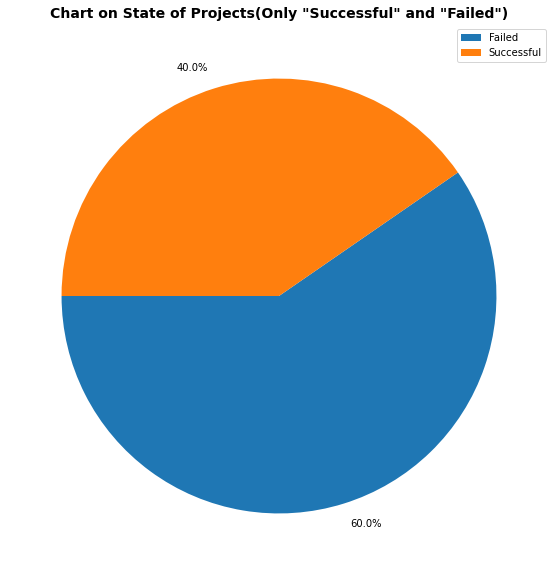

In [48]:
plt.figure(figsize=(12,10))
plt.title('Chart on State of Projects(Only "Successful" and "Failed")', fontsize=14, fontweight='bold')
plt.pie(df_state_new['Count'],labels=percent, startangle=180)
plt.legend(['Failed','Successful'], loc='best')